#Exercise 3: A Simple Classifier, Optimization and BERT.

You can work in pairs or individually.

Upload your solution on OLAT before the deadline: **Friday, 22nd November 2024,  at 12:15**.

If you have any questions, post them on OLAT.

**Submission Format**
- Filename: **olatnameStudent1_olatnameStudent2_ml_ex2.ipynb**
- Include the names of **both team members** in the block below.
- If you have multiple files, place your file(s) in a compressed folder (zip).


Good luck! :)

Mert Erol, 20-915-245, merol

**Important: only change the code where you're asked to (TODO). Please don't change the rest of the code.**

# Task 1. Training a Classifier

In this task you will train a simple classifier using a feed-forward network. Go through the code, finish it where necessary (TODO) and answer the questions in code comments and in the text cell.

In [ ]:
#import all the necessary libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
#here we will load the Iris dataset: a dataset that contains information about 3 kinds of Iris flowers

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
#always remember to split your data into at least 2 sets: train and test

#DONE: set test size to 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#we will also standardize the data to improve model convergence

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#and now we convert our data into PyTorch tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


Model equations:

- $\mathbf{h} = \mathbf{\sigma(Hx)}$

- $\mathbf{out} = \mathbf{Oh}$

where $\mathbf{\sigma} = \mathbf{ReLU}$

In [ ]:
#here we define the model

class Iris(nn.Module):
  def __init__(self):
    super(Iris, self).__init__()
    self.H = nn.Linear(4, 10)
    self.O = nn.Linear(10, 3)
    self.relu = nn.ReLU()

  def forward(self, x):

    #TODO: define the forward pass
    h = self.relu(self.H(x))
    out = self.O(h)

    return out

In [ ]:
#instantiate the model, the loss function and an optimizer

torch.manual_seed(42)

model = Iris() #TODO
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
#now we create a dataset using data loader from PyTorch

dataset_size = len(X_train_tensor)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=dataset_size, shuffle=False)

In [ ]:
#train the model

epochs = 10

loss_values = [] #we will store the values here so that we can visualize them later

for epoch in range(epochs):
  epoch_loss = 0

  for inputs, labels in train_loader:

    optimizer.zero_grad() #DONE: Clear previous gradients to prevent accumulation

    outputs = model(inputs)
    loss = loss_function(outputs, labels)

    epoch_loss += loss.item()

    #here we perform the backward pass

    loss.backward() #DONE: This computes the derivative of the loss function w.r.t the model's parameters
    optimizer.step() #DONE: Update model parameters using the gradients calculated by loss.backward()

  average_loss = epoch_loss / len(train_loader)
  loss_values.append(average_loss)

  #we will print the loss so we can see how it progresses
  print(f'Epoch: {epoch}/{epochs},\nLoss: {loss.item()}')



Epoch: 0/10,
Loss: 1.0531744956970215
Epoch: 1/10,
Loss: 1.0500966310501099
Epoch: 2/10,
Loss: 1.04703950881958
Epoch: 3/10,
Loss: 1.043992280960083
Epoch: 4/10,
Loss: 1.0409557819366455
Epoch: 5/10,
Loss: 1.0379427671432495
Epoch: 6/10,
Loss: 1.0349594354629517
Epoch: 7/10,
Loss: 1.0320091247558594
Epoch: 8/10,
Loss: 1.029105544090271
Epoch: 9/10,
Loss: 1.026219129562378


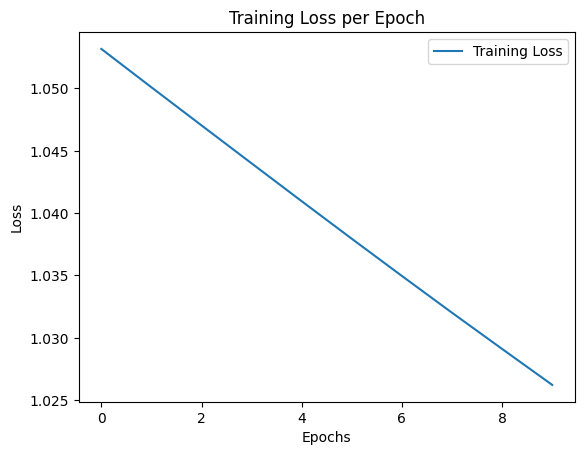

In [ ]:
#TODO: visualise the progression of loss using a line plot (loss per epoch)

import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_values, label="Training Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")

plt.legend()
plt.show()

TODO: answer the following questions.

- Look at the cell where we create a data loader. Which optimization algorithm are we using: GD, SGD or mini-batch GD? How do you know?
    - mini Batch because we update the parameters after each iteration of the inner loop

- Observe how the loss value changes. Considering the optimizer, do you notice any trends? How do these trends align with the expected behaviour of the optimizer?
    - The SGD optimizer steadily reduces the loss over epochs, as shown by the linear decrease in the plot. This aligns with the expected behavior of SGD, which iteratively adjusts parameters to minimize loss.

# Task 2. Adjusting Hyperparameters

In this task you will experiment with **the same model** setup, but **different hyperparameters** to observe their effect.

## Task 2.1. Adjusting Optimizers

In task 1 you used one of the following optimizing algorithms: GD, SGD or mini-batch GD.

Your task is:

- to **finish the code** in the cells below and implement the other **2 optimizers** (e.g., if you say that task 1 uses SGD, you have to implement GD and mini-batch GD);

- to answer the questions (comments in code and text cell at the end of the task);

- to visualise loss (you can reuse your code from task 1).



Note #1: don't be intimidated by all the code - it's the same code as in task 1, you just need to adjust it wherever there's a 'TODO'.

Note #2: To implement different optimizers, you just need to set the right batch size.

In [ ]:
#TODO: reinstantiate the model, the loss function and the optimizer. Why do we need to do it?

torch.manual_seed(42) #TODO: What does this line of code do?

model = Iris() #TODO
loss_function = nn.CrossEntropyLoss() #TODO
optimizer = optim.SGD(model.parameters(), lr=0.01) #TODO

In [ ]:
#now we create a dataset using data loader from PyTorch

dataset_size = len(X_train_tensor)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True) #TODO: adjust the batch size

In [ ]:
#train the model

epochs = 10

loss_values = [] #we will store the values here so that we can visualize them later

for epoch in range(epochs):
  epoch_loss = 0

  for inputs, labels in train_loader:

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = loss_function(outputs, labels)

    epoch_loss += loss.item()

    #TODO: perform the backward pass

    loss.backward()
    optimizer.step()

  average_loss = epoch_loss / len(train_loader)
  loss_values.append(average_loss)

  #we will print the loss so we can see how it progresses
  print(f'Epoch: {epoch}/{epochs},\nLoss: {loss.item()}')



Epoch: 0/10,
Loss: 1.0592658519744873
Epoch: 1/10,
Loss: 0.34543657302856445
Epoch: 2/10,
Loss: 0.174723818898201
Epoch: 3/10,
Loss: 0.12185793370008469
Epoch: 4/10,
Loss: 0.7237241268157959
Epoch: 5/10,
Loss: 0.5397452116012573
Epoch: 6/10,
Loss: 0.1266338974237442
Epoch: 7/10,
Loss: 0.34989964962005615
Epoch: 8/10,
Loss: 0.04827488958835602
Epoch: 9/10,
Loss: 0.04079185798764229


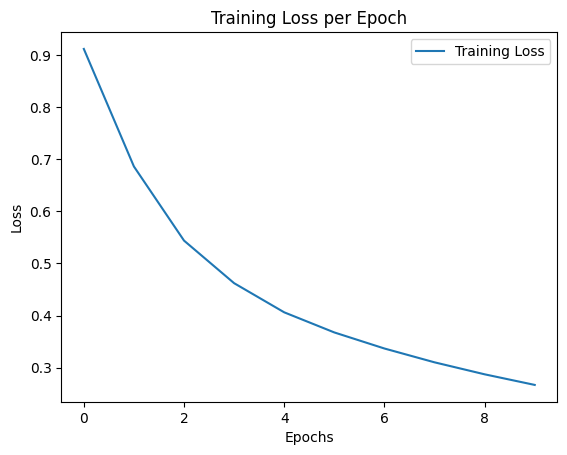

In [ ]:
#visualise the loss - you can reuse your code from task 1
import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_values, label="Training Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")

plt.legend()
plt.show()

Now repeat the process for the 3rd optimizer

In [ ]:
#TODO: reinstantiate the model, the loss function and the optimizer.

torch.manual_seed(42)

model = Iris() #TODO
loss_function = nn.CrossEntropyLoss() #TODO
optimizer = optim.SGD(model.parameters(), lr=0.01) #TODO

In [ ]:
#now we create a dataset using data loader from PyTorch

dataset_size = len(X_train_tensor)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) #TODO: adjust the batch size

In [ ]:
#train the model

epochs = 10

loss_values = [] #we will store the values here so that we can visualize them later

for epoch in range(epochs):
  epoch_loss = 0

  for inputs, labels in train_loader:

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = loss_function(outputs, labels)

    epoch_loss += loss.item()

    #TODO: perform the backward pass

    loss.backward()
    optimizer.step()

  average_loss = epoch_loss / len(train_loader)
  loss_values.append(average_loss)

  #we will print the loss so we can see how it progresses
  print(f'Epoch: {epoch}/{epochs},\nLoss: {loss.item()}')



Epoch: 0/10,
Loss: 1.101258635520935
Epoch: 1/10,
Loss: 1.0393818616867065
Epoch: 2/10,
Loss: 1.0003453493118286
Epoch: 3/10,
Loss: 0.9748765826225281
Epoch: 4/10,
Loss: 1.0491794347763062
Epoch: 5/10,
Loss: 1.0841038227081299
Epoch: 6/10,
Loss: 0.9221776127815247
Epoch: 7/10,
Loss: 0.9913058280944824
Epoch: 8/10,
Loss: 0.9830357432365417
Epoch: 9/10,
Loss: 0.9251051545143127


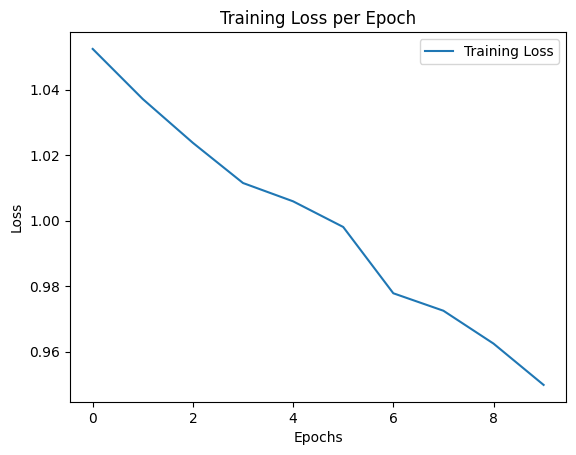

In [ ]:
#visualise the loss - you can reuse your code from task 1
import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_values, label="Training Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")

plt.legend()
plt.show()

TODO: answer the following questions.

- Observe the loss values for all 3 optimizers (including the one in task 1). What trends do you observe?
    - There are times where the loss gets worse and times where it gets better. The loss values are not consistent and vary a lot. But in general, the loss is decreasing over time.

- How does changing the batch size impact the training process? What is the trade-off between using a smaller batch size versus a larger one in terms of training time and model performance?
    - In my opinion, the larger the batch size the "linear" the graph
    -

## Task 2.2. Adjusting the Learning Rate

In this part of the task you will experiment with the learning rate.

Finish the training function below. It collects and returns loss values for a given learning rate.

In [ ]:
def train_model(learning_rate):

    torch.manual_seed(42)
    model = Iris()
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    epochs = 50
    loss_values = []

    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, labels in train_loader:

            #TODO: perform the forward pass
            outputs = model(inputs)
            #TODO: compute loss
            loss = loss_function(outputs, labels)
            epoch_loss += loss.item()
            #TODO: perform the backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


        average_loss = epoch_loss / len(train_loader)
        loss_values.append(average_loss)

    return loss_values

#TODO: collect and observe loss values with different learning rates. Make sure you have data for high and low learning rates!
learning_rates = [0.01, 0.1, 0.5, 1.0, 0.04, 0.3, 0.8, 0.45, 0.425]
loss_history = {}

for lr in learning_rates:
    loss_history[lr] = train_model(lr)

loss_history

{0.01: [1.0443763807415962,
  1.0140580981969833,
  1.0020607933402061,
  0.982064425945282,
  0.9614473432302475,
  0.9413332492113113,
  0.9080088958144188,
  0.8993261903524399,
  0.8757209181785583,
  0.8645834401249886,
  0.8416028246283531,
  0.824836865067482,
  0.8206149190664291,
  0.814876526594162,
  0.7942548096179962,
  0.7675596624612808,
  0.7468973025679588,
  0.738715186715126,
  0.732689768075943,
  0.7208580076694489,
  0.7135039865970612,
  0.6805671527981758,
  0.6819596514105797,
  0.6699745059013367,
  0.652934867888689,
  0.6500366777181625,
  0.6404665932059288,
  0.6196310482919216,
  0.610417865216732,
  0.6105613857507706,
  0.6017991080880165,
  0.5709689781069756,
  0.5783854499459267,
  0.583309892565012,
  0.5616936050355434,
  0.5452751442790031,
  0.5419803410768509,
  0.5265189930796623,
  0.5322357825934887,
  0.5307054780423641,
  0.522824652493,
  0.5203141644597054,
  0.5039902627468109,
  0.5053657367825508,
  0.5105062499642372,
  0.491165466606

TODO: plot the loss per epoch for different learning rates:

- create a single plot figure;

- for each learning rate, plot the loss values against the epochs;

- make sure that each learning rate is represented by a distinct line: use different colours or markers to differentiate between them.

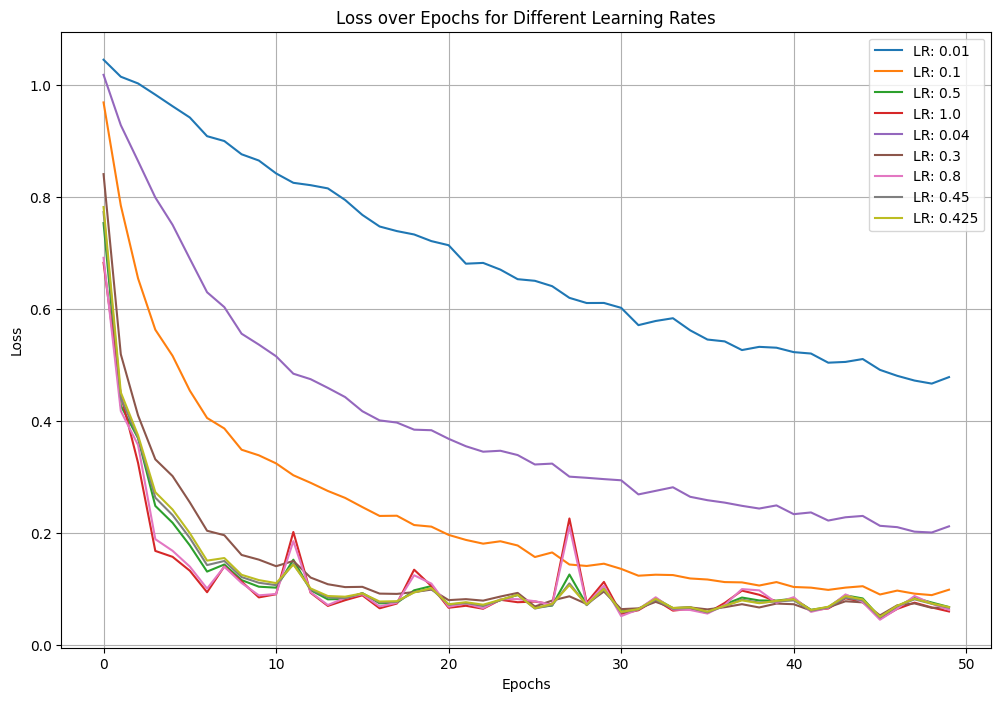

In [ ]:
#TODO: code to visualize the losses
plt.figure(figsize=(12, 8))

for lr, loss_values in loss_history.items():
    plt.plot(loss_values, label=f'LR: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

TODO: answer the question

- Observe the plot. What trends do you notice? What differences do you notice? Can you explain them?
    - We can observe that higher learning rates lead to faster initial loss reduction, but they also cause more fluctuation, possibly due to overshooting optimal values. Lower learning rates show a slower, more stable decrease in loss but require more epochs to converge. --> higher learning rates converge quickly but risk instability, while lower rates provide steadier, more controlled convergence.


## Task 2.3. Adjusting Dropout

Three tasks:
1. Finish the code block "Model with dropout"
2. Change the drop out rate, observe the patterns, and answer what is going on in the graph.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# nothing to change here
torch.manual_seed(42)
np.random.seed(42)

def create_noisy_dataset(n_samples=1000):
    X = np.random.randn(n_samples, 50)  # 100 noisy features
    # true pattern: only first five features
    y = (2 * X[:, 0] + X[:, 1] - 1.5 * X[:, 2] + 0.5 * X[:, 3] - X[:, 4] > 0).astype(int)
    # add noise to labels (15% random flip in this binary classification task)
    noise_mask = np.random.random(n_samples) < 0.15
    y[noise_mask] = 1 - y[noise_mask]
    return torch.FloatTensor(X), torch.LongTensor(y)

# create dataset
X, y = create_noisy_dataset(2000)  # 2000 samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# add dropout layers here

# Model with dropout
# read this: https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
class ModelWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(ModelWithDropout, self).__init__()
        self.fc1 = nn.Linear(50, 128)
        self.dropout1 = nn.Dropout() ## TOOO
        self.fc2 = nn.Linear(128, 128)
        self.dropout2 = nn.Dropout() ## TOOO
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout() ## TOOO
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        return self.fc4(x)

In [ ]:
# Model without dropout
class ModelWithoutDropout(nn.Module):
    def __init__(self):
        super(ModelWithoutDropout, self).__init__()
        self.fc1 = nn.Linear(50, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

In [ ]:
# nothing to change here
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=200):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_accs = []
    test_accs = []

    for epoch in range(epochs):
        # training
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # evaluation
        model.eval()
        with torch.no_grad():
            # train accuracy
            train_preds = torch.argmax(model(X_train), dim=1)
            train_acc = (train_preds == y_train).float().mean().item()

            # test accuracy
            test_preds = torch.argmax(model(X_test), dim=1)
            test_acc = (test_preds == y_test).float().mean().item()

            # collect the accuracies for plotting
            train_accs.append(train_acc)
            test_accs.append(test_acc)

        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch+1}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

    return train_accs, test_accs

In [ ]:
# nothing to change in this block
def plot_training_results(train_acc_dropout, test_acc_dropout, train_acc_no_dropout, test_acc_no_dropout, dropout_rate):
    plt.figure(figsize=(12, 6))

    # plot model with dropout
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_dropout, 'b-', label='Train (with dropout)', alpha=0.7)
    plt.plot(test_acc_dropout, 'r-', label='Test (with dropout)', alpha=0.7)
    plt.title(f'Model with Dropout (rate={dropout_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.4, 1.0)

    # plot model without dropout
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_no_dropout, 'b-', label='Train (no dropout)', alpha=0.7)
    plt.plot(test_acc_no_dropout, 'r-', label='Test (no dropout)', alpha=0.7)
    plt.title('Model without Dropout')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.4, 1.0)

    plt.tight_layout()
    plt.show()

Training model with dropout...
Epoch 20, Train Acc: 0.7462, Test Acc: 0.6700
Epoch 40, Train Acc: 0.7969, Test Acc: 0.7200
Epoch 60, Train Acc: 0.8400, Test Acc: 0.7575
Epoch 80, Train Acc: 0.8606, Test Acc: 0.7650
Epoch 100, Train Acc: 0.8813, Test Acc: 0.7700
Epoch 120, Train Acc: 0.8956, Test Acc: 0.7675
Epoch 140, Train Acc: 0.9212, Test Acc: 0.7650
Epoch 160, Train Acc: 0.9269, Test Acc: 0.7625
Epoch 180, Train Acc: 0.9425, Test Acc: 0.7650
Epoch 200, Train Acc: 0.9506, Test Acc: 0.7625

Training model without dropout...
Epoch 20, Train Acc: 0.7987, Test Acc: 0.6975
Epoch 40, Train Acc: 0.9000, Test Acc: 0.7325
Epoch 60, Train Acc: 0.9806, Test Acc: 0.6825
Epoch 80, Train Acc: 0.9981, Test Acc: 0.6675
Epoch 100, Train Acc: 1.0000, Test Acc: 0.6750
Epoch 120, Train Acc: 1.0000, Test Acc: 0.6700
Epoch 140, Train Acc: 1.0000, Test Acc: 0.6775
Epoch 160, Train Acc: 1.0000, Test Acc: 0.6800
Epoch 180, Train Acc: 1.0000, Test Acc: 0.6800
Epoch 200, Train Acc: 1.0000, Test Acc: 0.6800


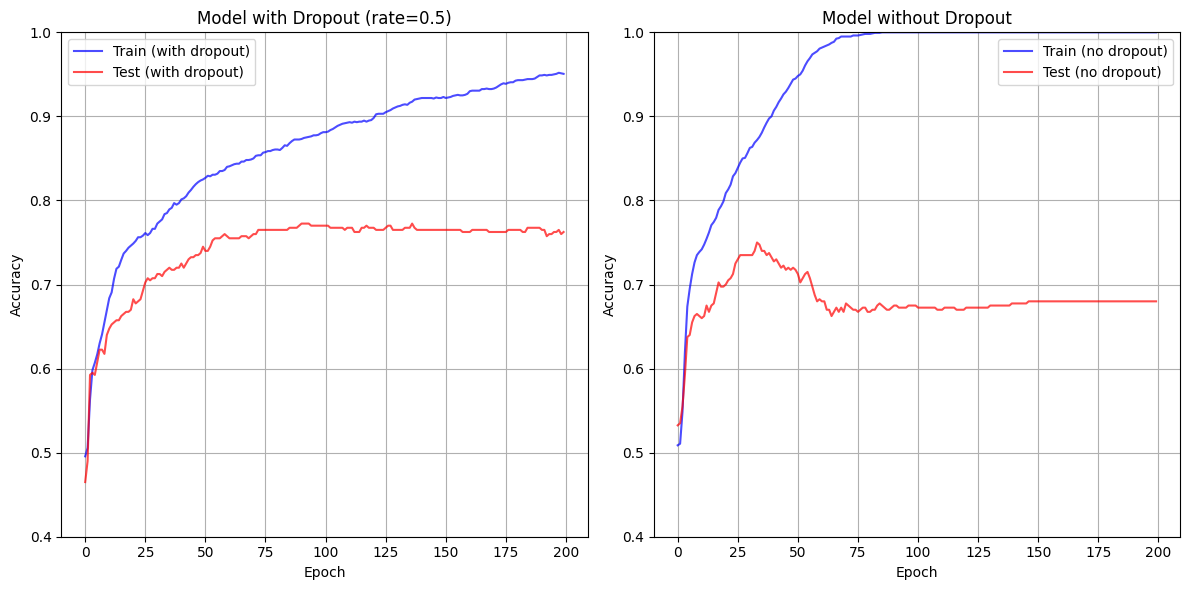

In [ ]:
# you can play around with this dropout rate
my_dropout_rate = 0.5

# nothing to change below
print("Training model with dropout...")
model_with_dropout = ModelWithDropout(dropout_rate=my_dropout_rate)
train_acc_dropout, test_acc_dropout = train_and_evaluate(
    model_with_dropout, X_train, y_train, X_test, y_test
)

print("\nTraining model without dropout...")
model_without_dropout = ModelWithoutDropout()
train_acc_no_dropout, test_acc_no_dropout = train_and_evaluate(
    model_without_dropout, X_train, y_train, X_test, y_test
)

plot_training_results(
   train_acc_dropout,
   test_acc_dropout,
   train_acc_no_dropout,
   test_acc_no_dropout,
   dropout_rate=my_dropout_rate
)

**TODO:**

What do you observe when you set my_dropout_rate to 0.5 in the plot? Explain what happened in both models.

When setting the dropout rate to 0.5, the model with dropout (left plot) shows slower training accuracy improvement compared to the model without dropout (right plot), but it achieves more stable and higher test accuracy.

The model without dropout overfits, showing high training accuracy but lower and less stable test accuracy.

# Task 3: Huggingface and transformers library

Goals:
- Test out an interactive inference API on HF 🤗
- Import a model from hugging face
- define the model and perform a NLP task
- experiment with its capabilities and possible biases.


## Task 3.1 Huggingface: inference API

Follow the Link to view the model on Huggingface 🤗: https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base-sentiment

For more Information about the model and its intended use and performance, check out the corresponding paper: https://arxiv.org/abs/2104.12250




**TODO: Answer the following Questions:**

a) What kind of data was the model trained on, and for which subgroup of languages was sentiment-finetuning performed?

Trained on: tweets
Finetuned on: 8 languages (Ar, En, Fr, De, Hi, It, Sp, Pt)

b) You have the Sentence: **"My cat had kittens"** and you want test how the sentiment lable is influenced by including Punctuation **(.,?,!)**. You can use the Inference API on the website to get your outputs. Further more you are also curious what effect **different emojis** at the end of the sentence have on the model output, find 3 interesting examples and note them down as well.
  -   My cat had kittens --> Neutral: 0.676
  -   My cat had kittens. --> Neutral: 0.693
  -   My cat had kittens ♥ --> positive: 0.784
  -   My cat had kittens 😍😙😙 --> positive: 0.789
  -   My cat had kittens 😰 --> negative: 0.780
  -   My cat had kittens 🤖 --> neutral: 0.675
  -   My cat had kittens 🥷🏼--> neutral: 0.549


Your interpretation:

c) Find one or two interesting examples on your own and describe your results and why you thought they were noteworthy (if you choose a language different than english or german, we would appreciate a translation).

  - Such a beautiful disaster. --> negative: 0.732
      - I tried to use a sentence which might confuse the model and in the case of this sentence it is classified as negative. Depending on the context tho it might be considered to be positive

## Task 3.2 Huggingface: import a model and use it locally.

- We now know how to find a model on Huggingface and how to interact with the inference API (if available). But how can we load the model locally and actually work with it? There are 2 main approaches, using the pipeline or loading a model directly. We will have a closer look at both appraoches below.

In [ ]:
# first we need to have all necessary libraries installed
!pip3 install transformers sentencepiece tiktoken protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, XLMRobertaForSequenceClassification, pipeline
from scipy.special import softmax
from transformers import AutoConfig
import numpy as np
import torch

# define model variable with path to the model in Huggingface
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

# define Model and Tokenizer you want to use
model = XLMRobertaForSequenceClassification.from_pretrained(model_path)

tokenizer = AutoTokenizer.from_pretrained(model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

### 3.2.1 Using the Pipeline

In [ ]:
# No change is needed for this block
# Create the sentiment analysis pipeline with the chosen tokenizer and model
sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Analyze sentiment for a given text
result = sentiment_task("Huggingface es lo mejor! Awesome library 🤗😎")

# Print top label and score
print(result)

[{'label': 'positive', 'score': 0.9343641400337219}]


**TODO**: What is the advantage of the transformer pipeline?

Allows for quick implementation of complex tasks, like sentiment analysis, by handling all necessary preprocessing and model inference steps. This makes it efficient for developers to get high-quality results without needing to configure each component manually.

### 3.2.2 Apply tokenizer and model step by step

Find the hugging face quick tour here: https://huggingface.co/docs/transformers/en/quicktour

On the top right corner, there is a colab link - choose pytorch and open it. Or, the link is here: https://colab.research.google.com/github/huggingface/notebooks/blob/main/transformers_doc/en/pytorch/quicktour.ipynb

There are also other languages! It is on the top left corner, next to the versions.

The videos from Huggingface are also very helpful.

If you find the problems below are difficult to solve, check out these resources.

In [ ]:
config = AutoConfig.from_pretrained(model_path)
# Tokenize the input str.
inputs = tokenizer("Huggingface es lo mejor! Awesome library 🤗😎", return_tensors="pt")

**Fill in six TODO blocks below**

In [ ]:
## TODO_1: print out the input_ids
inputs["input_ids"]

tensor([[     0,   7674,  36659,  40404,    198,    459,   8114,     38, 227865,
          35773,   1294,      6, 243544, 161546,      2]])

In [ ]:
## TODO_2: convert the input_ids back to text and print out the first result
tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)

'Huggingface es lo mejor! Awesome library 🤗😎'

In [ ]:
## TODO_3: Tokenize a new word "Huggingface" (or any word you like)
new = tokenizer("Huggingface is great", return_tensors="pt")


In [ ]:
## TODO_4: What's the input_id "0" and "2" refering to? Find them using code. --> beggining and end of sentence
print(new["input_ids"])
print(tokenizer.decode(new["input_ids"][-1], skip_special_tokens = False))
print(tokenizer.decode(new["input_ids"][0], skip_special_tokens = False))

tensor([[    0,  7674, 36659, 40404,    83,  6782,     2]])
<s> Huggingface is great</s>
<s> Huggingface is great</s>


In [ ]:
# TODO_5: perform forward pass, and check the what the output looks like
with torch.no_grad():
    outputs = model(**new)

print("Raw model output:", new)

logits = outputs.logits
print("Logits:", logits)

from scipy.special import softmax

probs = softmax(logits.detach().numpy(), axis=-1)
print("Probabilities:", probs)

predicted_class = logits.argmax(dim=-1).item()
print(f"Predicted class: {predicted_class}")

Raw model output: {'input_ids': tensor([[    0,  7674, 36659, 40404,    83,  6782,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}
Logits: tensor([[-1.4712, -0.4544,  1.6827]])
Probabilities: [[0.03677651 0.10166396 0.8615595 ]]
Predicted class: 2


In [ ]:
import numpy as np
from scipy.special import softmax

def show_scores(output):
    # Convert output tensor to numpy array
    scores = output[0][0].detach().numpy()

    # Apply softmax to get probabilities
    scores = softmax(scores)

    # Sort indices by score in ascending order
    ranking = np.argsort(scores)

    # Reverse the order to have the highest score first
    ranking = ranking[::-1]

    # Print each label with its corresponding probability
    for i in range(scores.shape[0]):
        label = config.id2label[ranking[i]]
        probability = scores[ranking[i]]
        print(f"{i+1}) {label} {np.round(float(probability), 4)}")

# Example usage:
show_scores(outputs)


1) positive 0.8616
2) neutral 0.1017
3) negative 0.0368


**TODO**



Task 1: finish TODO_1, TODO_2, TODO_3, TODO_4, TODO_5, TODO_6 in the code above

Task 2: What is the advantage/disadvantage of this approach (compared to task 3.2.1)?

The pipeline approach is simpler and quicker.
It requires minimal code but lacks flexibility and transparency, making it harder to customize or debug.

The detailed implementation offers more control and transparency, allowing for customization.

However, it is more complex, time-consuming, and prone to errors, requiring a deeper understanding.


## 3.3 Huggingface: Fill-Mask-Task
For different tasks you might want to use different models. In the previous task we looked into SequenceClassification or more specifically "sentiment analysis". In this task we look at the "Fill-Mask" Task, where a model predicts the masked word. Documentation of ForMaskedLM: https://huggingface.co/docs/transformers/tasks/masked_language_modeling

- For more details about the model, you can visit the model page on HF: https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base


**TODO**

Write your own example sentence. Then we already provided you with a base code for your task and you can **choose one of the two approaches** (pipeline or step by step application).

**You are allowed to change/adapt the code, as long as the output is presented the way it's described in 3.**

Your task is to adapt the code so that:

1. You define **3 different versions** of your original sentence, each version masks a different word/token.

2. loop over each sample sentence and print out the **top 5** results for you masked word in each input sentence.

3. your output sould show all results **at once** (e.g. show input + top 5 results incl. probability scores, show input_2 + top 5 results incl. probability scores, etc.). It doen't need to look pretty, as long as its functional and easy to read.

4. What do you think about the results?
    - In my opinion i like approach two more because it gives me more information to work with and see how the model came to its result.



In [ ]:
# Load model and tokenizer
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-xlm-roberta-base")
model = AutoModelForMaskedLM.from_pretrained("cardiffnlp/twitter-xlm-roberta-base")

config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

### Approach 1

In [ ]:
text = "I enjoy doing <mask> ."
inputs = tokenizer(text, return_tensors="pt")
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]
logits = model(**inputs).logits
mask_token_logits = logits[0, mask_token_index, :]

# Apply softmax to get probabilities
softmax_output = torch.nn.functional.softmax(mask_token_logits, dim=-1)

# Get the top 3 results
top_3_results = torch.topk(softmax_output, 3, dim=1)

print(text, "\n")
for i in range(len(top_3_results.indices[0])):
    token = top_3_results.indices[0][i].item()
    probability = top_3_results.values[0][i].item()
    filled_text = text.replace(tokenizer.mask_token, tokenizer.decode([token]))
    print(f"Filled text: {filled_text}, Probability: {probability:.4f}")


I enjoy doing <mask> . 

Filled text: I enjoy doing this ., Probability: 0.5140
Filled text: I enjoy doing it ., Probability: 0.0660
Filled text: I enjoy doing that ., Probability: 0.0418


### Approach 2

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("fill-mask", model=model, tokenizer=tokenizer)

In [ ]:
#Todo: Use your own sentence here
results = pipe("I enjoy doing <mask>.")

# Display only the top 3 results
print(text, "\n")
for res in results[:3]:  # Slicing to get the top 3 results
    print(res)


I enjoy doing <mask> . 

{'score': 0.5140401124954224, 'token': 903, 'token_str': 'this', 'sequence': 'I enjoy doing this .'}
{'score': 0.06602844595909119, 'token': 442, 'token_str': 'it', 'sequence': 'I enjoy doing it .'}
{'score': 0.04183744266629219, 'token': 450, 'token_str': 'that', 'sequence': 'I enjoy doing that .'}
